In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from scipy import stats
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('Datasets/cif_xyz_nonfg_train.csv');df.head()

,MOFname,volume,density,weight,surface_area,void_fraction,void_volume,functional_groups,metal_linker,organic_linker1,...,Lattice7,Lattice8,Lattice9,C+O+H,C,O,H,sumatom,mean_charge,sum_charge
0,mof_unit_2,2769.503842,1.326090,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,...,-0.600769,-3.410680,18.641128,173,71,35,67,194,5.150000e-09,0.000001
1,mof_unit_3,1089.818728,1.178856,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,...,0.010529,0.148108,10.630959,80,32,14,34,82,-3.660000e-08,-0.000003
2,mof_unit_4,2205.198301,0.982408,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,...,-0.078915,-6.446998,18.164659,107,56,23,28,112,4.460000e-08,0.000005
3,mof_unit_6,3954.659761,0.647909,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,...,-2.470500,-0.012234,22.470616,158,72,24,62,164,-1.830000e-08,-0.000003
4,mof_unit_7,3565.914939,0.910268,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,...,0.012840,-4.025383,22.428988,165,68,28,69,182,2.200000e-08,0.000004


In [3]:
df_label = pd.DataFrame(df.CO2_working_capacity)
# df.drop(['CO2_working_capacity','MOFname'],axis=1,inplace=True)
df.drop('MOFname',axis=1,inplace=True)
df.head()

,volume,density,weight,surface_area,void_fraction,void_volume,functional_groups,metal_linker,organic_linker1,organic_linker2,...,Lattice7,Lattice8,Lattice9,C+O+H,C,O,H,sumatom,mean_charge,sum_charge
0,2769.503842,1.326090,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,...,-0.600769,-3.410680,18.641128,173,71,35,67,194,5.150000e-09,0.000001
1,1089.818728,1.178856,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,...,0.010529,0.148108,10.630959,80,32,14,34,82,-3.660000e-08,-0.000003
2,2205.198301,0.982408,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,...,-0.078915,-6.446998,18.164659,107,56,23,28,112,4.460000e-08,0.000005
3,3954.659761,0.647909,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,...,-2.470500,-0.012234,22.470616,158,72,24,62,164,-1.830000e-08,-0.000003
4,3565.914939,0.910268,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,...,0.012840,-4.025383,22.428988,165,68,28,69,182,2.200000e-08,0.000004


In [4]:
df.columns

Index(['volume', 'density', 'weight', 'surface_area', 'void_fraction',
       'void_volume', 'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K', 'CO2_working_capacity',
       'cell_length_a', 'cell_length_b', 'cell_length_c', 'cell_angle_alpha',
       'cell_angle_beta', 'cell_angle_gamma', 'Lattice1', 'Lattice2',
       'Lattice3', 'Lattice4', 'Lattice5', 'Lattice6', 'Lattice7', 'Lattice8',
       'Lattice9', 'C+O+H', 'C', 'O', 'H', 'sumatom', 'mean_charge',
       'sum_charge'],
      dtype='object')

<AxesSubplot:>

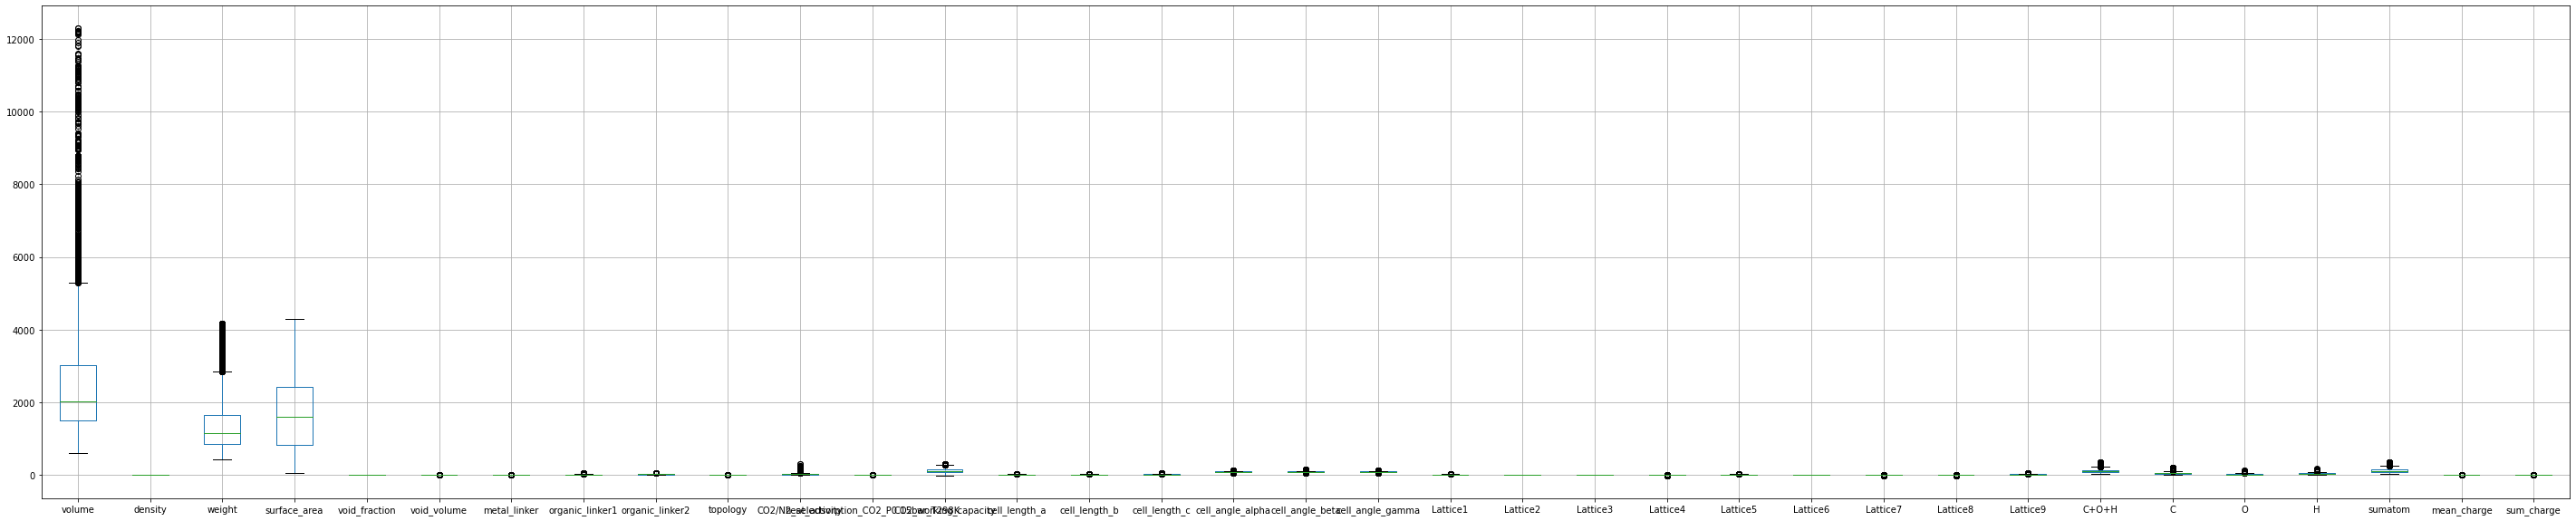

In [5]:
df[(np.abs(stats.zscore(df[['volume','density','weight','surface_area','void_fraction','void_volume','sumatom','CO2_working_capacity','CO2/N2_selectivity','heat_adsorption_CO2_P0.15bar_T298K']])) < 2).all(axis=1)].boxplot(figsize=(50,10))

In [8]:
df = df[(np.abs(stats.zscore(df[['volume','density','weight','surface_area','void_fraction','void_volume','sumatom','CO2_working_capacity','CO2/N2_selectivity','heat_adsorption_CO2_P0.15bar_T298K']])) < 2).all(axis=1)]

In [9]:
df.reset_index(inplace=True);df

,index,volume,density,weight,surface_area,void_fraction,void_volume,functional_groups,metal_linker,organic_linker1,...,Lattice7,Lattice8,Lattice9,C+O+H,C,O,H,sumatom,mean_charge,sum_charge
0,0,2769.503842,1.326090,2211.697211,603.6100,0.13794,0.1040,F-OMe,10,44,...,-0.600769,-3.410680,18.641128,173,71,35,67,194,5.150000e-09,0.000001
1,1,1089.818728,1.178856,773.687960,788.5000,0.14874,0.1262,OMe-COOH,2,22,...,0.010529,0.148108,10.630959,80,32,14,34,82,-3.660000e-08,-0.000003
2,2,2205.198301,0.982408,1304.638720,1441.5300,0.21814,0.2220,H-SO3H,9,17,...,-0.078915,-6.446998,18.164659,107,56,23,28,112,4.460000e-08,0.000005
3,3,3954.659761,0.647909,1543.027680,2430.5500,0.37094,0.5725,Pr-NO2,9,7,...,-2.470500,-0.012234,22.470616,158,72,24,62,164,-1.830000e-08,-0.000003
4,4,3565.914939,0.910268,1954.749656,1530.0200,0.33337,0.3662,NH2,10,53,...,0.012840,-4.025383,22.428988,165,68,28,69,182,2.200000e-08,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40304,66541,1042.769025,1.448660,909.715060,160.3885,0.02287,0.0158,NHMe-COOH,2,10,...,-0.874950,-1.994020,7.507384,83,31,18,34,91,-1.100000e-08,-0.000001
40305,66564,1087.962590,1.422133,931.761916,162.5569,0.02330,0.0164,F-Ph,2,12,...,-1.500357,-3.686025,9.190853,79,46,8,25,86,-1.160000e-08,-0.000001
40306,66568,1127.564092,1.398902,949.902820,160.2930,0.01778,0.0127,OEt-OMe,2,9,...,0.025419,0.136717,9.701102,99,49,12,38,101,2.970000e-08,0.000003
40307,67617,1114.428839,1.312490,880.844100,152.1240,0.01180,0.0000,CN-OPr,2,4,...,-0.072567,-0.109717,9.582814,90,45,10,35,93,4.300000e-08,0.000004
